#### Model 1: Using Age as a Predictor of Price.  

### Exploratory Analysis
Age and Price are numeric integers. The minimum age for the Honda Accords in this dataset is 0 and the maximum age is 11 years old. The average age is 4.44 years old. The distribution of ages for is right skewed. As for Price, the minimum price is $\$6,000$ and the maximum is $\$28,500$. The average price is $\$16,490.$ The distribution for prices looks closely normal but right skewed as well. 

[1] 25  3

'data.frame':	25 obs. of  3 variables:
 $ Age  : int  3 1 2 3 2 4 3 0 3 4 ...
 $ Miles: num  25.9 15.4 5.2 43.6 43.2 12.2 30.1 2.6 44.5 49.2 ...
 $ Price: num  19.5 20 24 20.6 20 17.8 18 28.5 17.5 17.4 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    2.00    4.00    4.44    6.00   11.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.00   12.40   17.40   16.49   20.00   28.50 

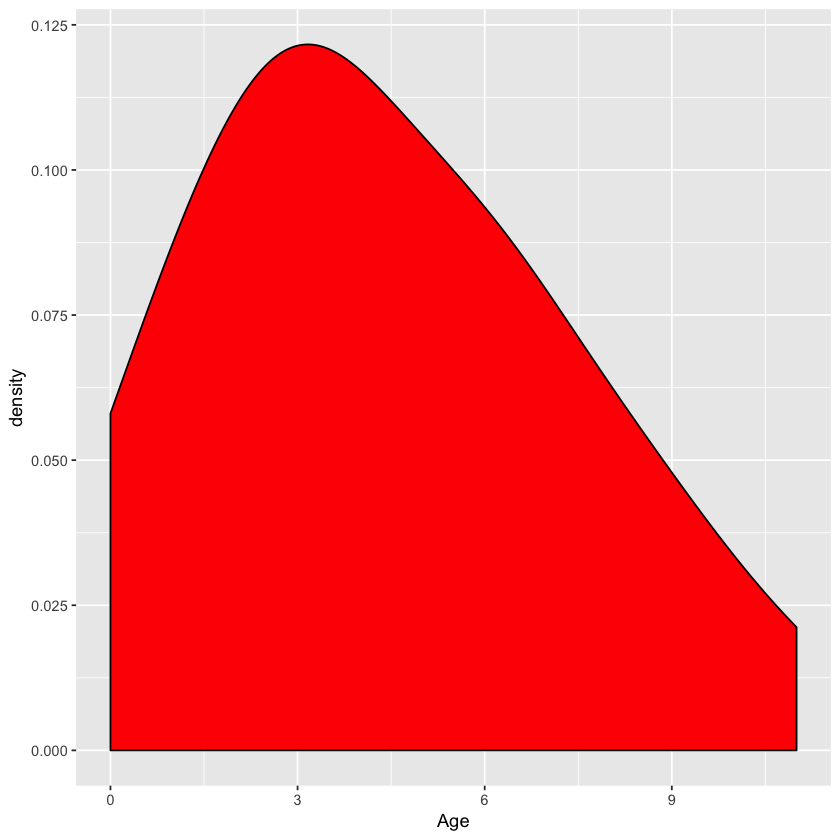

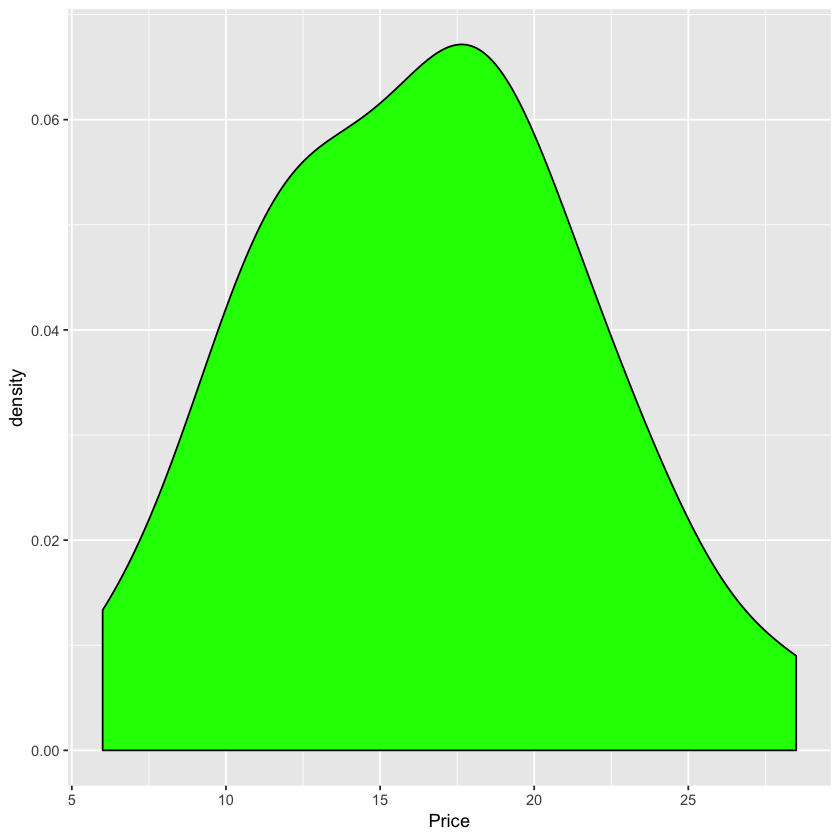

In [2]:
library(ggplot2)
Honda_Accord<-read.csv("HondaAccord2.csv")
dim(Honda_Accord)
str(Honda_Accord)
summary(Honda_Accord$Age)
summary(Honda_Accord$Price)
ggplot(Honda_Accord, aes(x = Age)) + geom_density(fill = 'red')
ggplot(Honda_Accord, aes(x = Price)) + geom_density(fill = 'green')

We can see from the scatterplot below that as the number of miles increase, the price of the Honda Accord decreases.



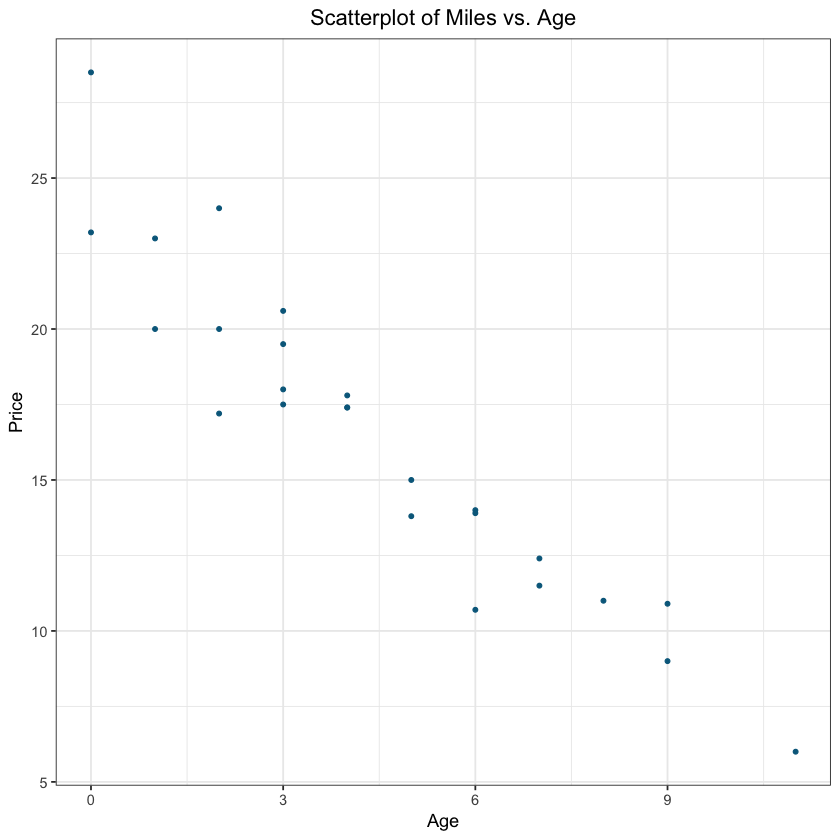

In [3]:
library(ggplot2)
ggplot(Honda_Accord, aes(x=Age, y=Price)) + geom_point(size=1,color="deepskyblue4",fill="deepskyblue4") + scale_colour_hue(l=10) +ggtitle("Scatterplot of Miles vs. Age") + theme_bw() + theme(plot.title = element_text(hjust=0.5))

### Show how to calculate the least squares regression line that best fits your data. Intrepret in context what the slope estimate tells you about price and ages of your used car model. Explain why the sign makes sense.

We can calculate the sample slope by using the following:

$b_1 = r(\frac{s_y}{s_x})$

* $b_1$ is the sample slope.
* $s_y$ is the sample standard deviation for price.
* $s_x$ is the sample standard deviation for age.


We can calculate the y-intercept by doing the following:

$b_0 = \bar{y} - b_1(\bar{x})$



In [4]:
r<-cor(Honda_Accord$Price,Honda_Accord$Age)
r 
sd_Price<-sd(Honda_Accord$Price)

sd_Price

sd_Age<-sd(Honda_Accord$Age)

sd_Age

b1 <-(r)*(sd_Price/sd_Age)
b1

b0<-mean(Honda_Accord$Price)-b1*mean(Honda_Accord$Age)
b0


[1] -0.9419837

[1] 5.287006

[1] 2.945052

[1] -1.691065

[1] 24.00033

The equation of the least squares regression line of Price on Age is $\hat{y} = -1.69x +24$.

For every 1 year change in age, there is a decrease of $1,691.10 in price. The negative makes sense because as the age of the Honda Accord increases, the price decreases. There is an inverse relationship between price and age.

### Show how to determine the standard deviation of the error term or typical error for your model.

The standard deviation of the error term or typical error gives one an idea of how the far the actual values spread above or below the regression line. The smaller the value is the better the regression line fits the data. To calculate the error, use the following formula below:

*$S_e = \sqrt(\frac{SSE}{n-2})$

n-2 is the degrees of freedom. 

We can obtain these values by constructing a one way ANOVA table as there is only one independent variable.

In [5]:
model<-lm(formula = Price~Age,data=Honda_Accord)
anova_Age<-anova(model)
anova_Age
s_e<-sqrt((75.58338)/(23))
s_e #other name: standard error for regression

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,595.27502,595.275020,181.142,2.166609e-12
Residuals,23,75.58338,3.286234,NA,NA


[1] 1.812797

The typical error is 1.813 standard errors away from the true slope.

### Comment on how well your data appears to fit the conditions for a simple linear model. Don't worry about transformations if there are problems with the conditions.

In order for the linear model to be justifiable for this dataset, the linear regression assumptions of the model should be met.

Linearity: Reasonable. The scatter plot of Miles vs. Price shows a consistent decrease in price as the age increases. However, there is a slight curvature...

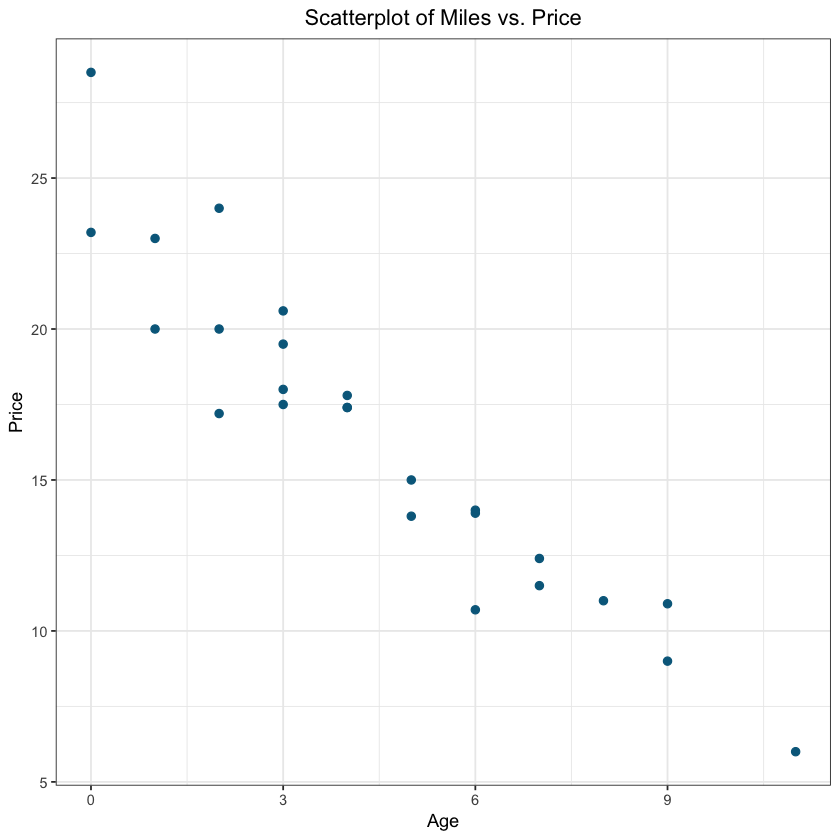

In [6]:
ggplot(Honda_Accord, aes(x=Age, y=Price)) + geom_point(size=2,color="deepskyblue4",fill="deepskyblue4") + scale_colour_hue(l=10) +ggtitle("Scatterplot of Miles vs. Price") + theme_bw() + theme(plot.title = element_text(hjust=0.5))

Zero Mean (of the residuals): The residuals are scattered on either side of 0 in the residual plot. There is no pattern in the residuals. 

Constant Variance: We can see that the equal variance assumption is violated because as the predicated response gets larger, the variability in the residuals increases. There is a fan shape. The variability in errors is not the same for all values of predictors. 

In [ ]:
install.packages('olsrr')
library('olsrr') 

In [ ]:
ols_plot_resid_fit(model)

In [ ]:
ols_plot_resid_qq(model) 

Normality: We can see if our data comes from a Normal Distribution by using a normal qq plot and histogram of residuals to check that assumpton. The normal quantile bends away from the straight line initially and  as the theoretical quantiles get bigger we do see that type of departure again. We can also look at the histogram. The distribution of residuals is right skewed. 

In [ ]:
# Histogram of residuals
library(dplyr)
library(knitr)
library(broom)
point_by_point <- augment(model) %>% 
  as_data_frame()
ggplot(point_by_point, aes(x=.resid)) +
  geom_histogram(binwidth = 2) + ggtitle("Residual Histogram")

### Find the car in your sample with the largest residual (in magnitude- positive or negative). Compare the residual to the standard error for regression. Do you think the residual is large enough to be considered an outlier? Explain.

In [ ]:
residuals_table<-data.frame(CarNo.=c(1:25),resid(model))
residuals_table %>%
  filter(resid.model. == max(resid.model.))

carNo.8_resid<-residuals_table %>%
  filter(resid.model. == max(resid.model.))
size_of_resid_car8_compared_to_se<-carNo.8_resid$resid.model/s_e
size_of_resid_car8_compared_to_se

If the residual is 2 times larger than the standard error for  regression, then it considered a possible outlier.
If the residual is 3 times larger than the standard error for regression, then it is a definite outlier.
The car with the largest residual in the data is car #8. Its residual is approximately 4.50 which is 2.5 times larger than the standard error for regression (1.813).
The residual is large enough to possibly be considered a definite outlier. 


### Compute and interpret a 90% confidence interval for the slope of your model. Show calculations. 

CI = $b_1 \frac{+}{-}   t_{n-2}(SE_{b_1})$

$t_{25} = 1.714$

In [ ]:
summary(model)
lower_ci<-(-1.6911)-((1.714)*(0.1256))
upper_ci<- (-1.6911)+((1.714)*(0.1256))
lower_ci
upper_ci

We are 90% confident that as the age in years increasees, the average price decreases between \$1900\$ and \$1480\$ in the population of used Honda Accords. 

### Compute $r^2$ in two ways.



We can compute $r^2$ by calculating the square of the correlation and using the partioned sum of squares from the one way anova. 

The formula for the latter is $r^2 = \frac{SSModel}{SSTotal}$
Code for calculations is listed below. 

In [ ]:
install.packages('gsubfn')
r<-cor(Honda_Accord$Price,Honda_Accord$Age)
r 
r_sq<-r**2
r_sq

model<-lm(formula = Price~Age,data=Honda_Accord)
anova_Age<-anova(model)
names(anova_Age) <- gsub(" ", "_", names(anova_Age)) #replace space with _ 
r_sql_another_method<-anova_Age[1,2]/sum(anova_Age$Sum_Sq)
r_sql_another_method



Interpretation: 88.73% of the variability in price can be explained using a simple linear model with Age as its predictor. 

### Test the strength for the linear relationship between your variables using each of the three methods. Show hypotheses and the details for calculating the test statistic in each case. Indicate the reference distribution (t or F including degrees of freedom) and use technology to get any p-values. One conclusion should suffice for all. 

1) Test for correlation:

p denotes the population correlation.

$H_0: p=0$

$H_a: p \neq 0$

$t=\frac{r\sqrt(n-2)}{\sqrt(1-r^2)}$




In [ ]:
n<-25
t<-r*((n-2)**(1/2))/(1-r**2)**(1/2)
t

We can see that the test statistic is far in the tail of a t-distribution with 23 degrees of freedom, so we have a p-value that is close to 0.0000 and this concludes that there is signficant correlation between the prices and ages of used Honda Accords.  

2) Test for slope:

$H_0: B_1 = 0$

$H_a: B_1 \neq 0$

t = $\frac{b_1}{SE_{b_1}}$

In [ ]:
t_2<- (-1.69)/(0.1256)
t_2

We can see that the test statistic is far in the tail of a t-distribution with 23 degrees of freedom, so we have a p-value that is close to 0.0000 and we can reject the $H_0$ that the true slope $B_1$ is 0.

3) t= $\frac{b_1}{SE_{b_1}}$


ANOVA for regression:


$H_0: b_1 = 0$

$H_a: b_1 \neq 0$

F= $\frac{MSModel}{MSE}$




In [ ]:
anova_Age
F<-595.275020/3.286234
F

Comparing this F statistic to an F distribution with 1 numerator and 23 degrees of freedom, we find a p value that is close to 0.0000 we can reject $H_0$ and conclude there is a linear relationship between price and age of used Honda Accords. 

Conclusion: Based on all three tests, there is a linear relationship/strong correlation between the price and age of used Honda Accords. 


### Choose a particular value of age for which you are interested in predicting the price of a car. Write sentences that carefully interpret each of the intervals ( in terms of car prices) and show the distinction between them.

In [ ]:
new.dat <- data.frame(Age=4)
predict(model,newdata = new.dat, interval = "confidence",level = 0.90)  #90% confidence interval
predict(model,newdata = new.dat, interval = "prediction",level = 0.90)  #90% prediction interval

The predicted price of a 4 year old used Honda Accord is \$17,236.07.

When we are estimating confidence intervals for this problem, what we are doing is  trying to explore what is the mean price of used Honda Accords. We want to explore the confidence interval around  $\mu_{price}$ when x (Age) is 4.


We are 90% confident that the mean price for used Honda Accords with an age of 4 years is between  \$16,607.51 and \$17,864.63

We should expect 90% of used Honda Accords with an age of 4 years to cost between \$14,066.22 and 

\$20,405.92

The fitted value is the same for both intervals, but the prediction interval is wider than the confidence interval because the formula for prediction interval takes into account of the additional term in the standard error of prediction. Confidence intervals takes into consideration uncertainty due to sampling, but prediction intervals also takes into account the data scatter around the predicted mean.  


### According to your model, is there an age at which the car should be free. If so, find the age and comment on what the "free car" phenomenon says about the appropriateness of your model. 


In [ ]:
install.packages('polynom')
library('polynom')
x<-polynomial(c( 24,-1.69)) 
solve(x) 

The age at which the car should be free is approximately 14.20 years. The model is only appropriate for the x range for this dataset. We would face the problem of extrapolation being that the value of x is outside that range when y=0.

### Write a conclusion. Discuss your overall impressions of the linear model for describing your data. Point out any unusual values, interesting phenomena, or obvious departures from regression assumptions. 


Although the linear model does capture the inverse relationship relationship between age and price, the zero mean (of the residuals), constant variance, and normality assumptions have been violated. Hence, the linear model $\hat{y} = -1.69x +24$ is not good at describing our data.Since one or more of the conditions for a simple linear regression model have not been satisfied,  we will need to consider transformations for one or both variables. 

We can see that the equal variance assumption is violated because as the predicated response gets larger, the variability in the residuals increases. There is a fan shape. The variability in errors is not the same for all values of predictors.

The car with the largest residual in the data is car #8. Its residual is approximately 4.50 which is 2.5 times larger than the standard error for regression (1.813).The residual is large enough to possibly be considered a definite outlier/possible point of leverage.
